In [169]:
import pandas as pd 
from pathlib import Path
data_folder = Path("data").resolve()

In [170]:
import pandas as pd

# Read the Excel file into a dictionary of dataframes
df_dict = pd.read_excel(data_folder / 'cc_Dataset.xlsx', sheet_name=['Sales 19-21', 'Sales 17-18', 'TV Spent', 'PromotionalEvents', 'OnsiteTrade'])

# Create a separate dataframe for each sheet_name in the dictionary
sales_19_21_df = df_dict['Sales 19-21']
sales_17_18_df = df_dict['Sales 17-18']
tv_spent_df = df_dict['TV Spent']
promo_events_df = df_dict['PromotionalEvents']
onsite_trade_df = df_dict['OnsiteTrade']


In [171]:
print(f"Sales 17-18 min date: {sales_17_18_df['Date'].min()}")
print(f"Sales 17-18 max date: {sales_17_18_df['Date'].max()}")


print(f"Sales 19-21 min date: {sales_19_21_df['Date'].min()}")
print(f"Sales 19-21 max date: {sales_19_21_df['Date'].max()}")


print(f"TV SPENT min date: {tv_spent_df['Date'].min()}")
print(f"TV SPENT max date: {tv_spent_df['Date'].max()}")



print(f"Promotional Events min date: {promo_events_df['Date'].min()}")
print(f"Promotional Events max date: {promo_events_df['Date'].max()}")

print(f"Onsite Trade min date: {onsite_trade_df['Date'].min()}")
print(f"Onsite Trade max date: {onsite_trade_df['Date'].max()}")


Sales 17-18 min date: 2017-01-01 00:00:00
Sales 17-18 max date: 2018-12-01 00:00:00
Sales 19-21 min date: 2019-01-07 00:00:00
Sales 19-21 max date: 2021-07-12 00:00:00
TV SPENT min date: 2019-01-07 00:00:00
TV SPENT max date: 2021-07-12 00:00:00
Promotional Events min date: 2017-02-01 00:00:00
Promotional Events max date: 2021-12-01 00:00:00
Onsite Trade min date: 2017-01-01 00:00:00
Onsite Trade max date: 2020-12-01 00:00:00


In [172]:
sales_frames = [sales_17_18_df, sales_19_21_df]
sales = pd.concat(sales_frames)

In [173]:
print(f"Sales data min date: {sales['Date'].min()}")
print(f"Sales data max date: {sales['Date'].max()}")

Sales data min date: 2017-01-01 00:00:00
Sales data max date: 2021-07-12 00:00:00


In [174]:
sales = sales.sort_values(by='Date')

In [175]:
tv_spent_df = tv_spent_df.rename(columns={'Channel 1': 'tv_channel_1', 
'Channel 2': 'tv_channel_2', 'Channel 3':'tv_channel_3'})

In [176]:
# Merge the TV spending data with the sales data
sales_tv_spent = pd.merge(sales, tv_spent_df, on='Date')

# Merge the promotional events data with the sales data
sales_promo_events = pd.merge(sales, promo_events_df, on='Date')

# Merge the trade marketing data with the sales data
sales_onsite_trade = pd.merge(sales, onsite_trade_df, on='Date')

In [177]:
sales_tv_spent.head()

,Date,Value,tv_channel_1,tv_channel_2,tv_channel_3
0,2019-01-07,2333.774722,605,125,37.381706
1,2019-01-14,2140.697120,508,167,34.766218
2,2019-01-21,2485.883420,0,166,46.756001
3,2019-01-28,2777.820794,0,191,47.218405
4,2019-02-04,2875.494071,0,158,44.303406


In [178]:
corr_tv_spent = sales_tv_spent.corr()['Value'].loc['tv_channel_1':'tv_channel_3']
corr_tv_spent

tv_channel_1    0.225166
tv_channel_2    0.553599
tv_channel_3    0.805690
Name: Value, dtype: float64

In [179]:
import numpy as np 
# Calculate the total TV spending
tv_spending = sales_tv_spent['tv_channel_1'] + sales_tv_spent['tv_channel_2'] + sales_tv_spent['tv_channel_3']

# Calculate the ROI for each TV channel
sales_tv_spent['TV_Channel_1_ROI'] = (sales_tv_spent.Value * sales_tv_spent['tv_channel_1']) / np.where(tv_spending == 0, 1, tv_spending)
sales_tv_spent['TV_Channel_2_ROI'] = (sales_tv_spent.Value * sales_tv_spent['tv_channel_2']) / np.where(tv_spending == 0, 1, tv_spending)
sales_tv_spent['TV_Channel_3_ROI'] = (sales_tv_spent.Value * sales_tv_spent['tv_channel_3']) / np.where(tv_spending == 0, 1, tv_spending)

# Calculate the total ROI for all TV channel investments
sales_tv_spent['TV_ROI'] = sales_tv_spent.Value / np.where(tv_spending == 0, 1, tv_spending)



In [181]:
sales_tv_spent

,Date,Value,tv_channel_1,tv_channel_2,tv_channel_3,TV_Channel_1_ROI,TV_Channel_2_ROI,TV_Channel_3_ROI,TV_ROI
0,2019-01-07,2333.774722,605,125,37.381706,1839.936627,380.152196,113.685900,3.041218
1,2019-01-14,2140.697120,508,167,34.766218,1532.158209,503.681931,104.856980,3.016059
2,2019-01-21,2485.883420,0,166,46.756001,0.000000,1939.577006,546.306414,11.684199
3,2019-01-28,2777.820794,0,191,47.218405,0.000000,2227.215701,550.605094,11.660815
4,2019-02-04,2875.494071,0,158,44.303406,0.000000,2245.775648,629.718424,14.213770
...,...,...,...,...,...,...,...,...,...
127,2021-06-14,870.464955,0,0,0.000000,0.000000,0.000000,0.000000,870.464955
128,2021-06-21,694.992249,0,111,0.000000,0.000000,694.992249,0.000000,6.261191
129,2021-06-28,1069.005723,0,174,0.000000,0.000000,1069.005723,0.000000,6.143711
130,2021-07-05,846.533905,0,0,0.000000,0.000000,0.000000,0.000000,846.533905


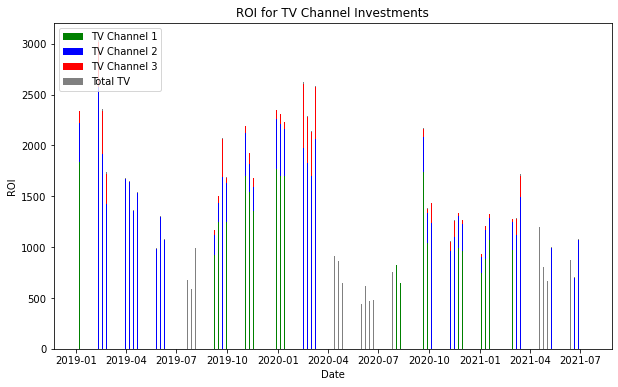

In [185]:
import matplotlib.pyplot as plt

# Define the labels and colors for the stacked bar chart
labels = sales_tv_spent['Date']
colors = ['green', 'blue', 'red', 'gray']

# Create the stacked bar chart
plt.figure(figsize=(10, 6))
plt.bar(labels, sales_tv_spent['TV_Channel_1_ROI'], color=colors[0], label='TV Channel 1')
plt.bar(labels, sales_tv_spent['TV_Channel_2_ROI'], bottom=sales_tv_spent['TV_Channel_1_ROI'], color=colors[1], label='TV Channel 2')
plt.bar(labels, sales_tv_spent['TV_Channel_3_ROI'], bottom=sales_tv_spent['TV_Channel_1_ROI'] + sales_tv_spent['TV_Channel_2_ROI'], color=colors[2], label='TV Channel 3')
plt.bar(labels, sales_tv_spent['TV_ROI'], bottom=sales_tv_spent['TV_Channel_1_ROI'] + sales_tv_spent['TV_Channel_2_ROI'] + sales_tv_spent['TV_Channel_3_ROI'], color=colors[3], label='Total TV')

# Set the chart title, legend, and axis labels
plt.title('ROI for TV Channel Investments')
plt.legend(loc='upper left')
plt.xlabel('Date')
plt.ylabel('ROI')

# Show the chart
plt.show()


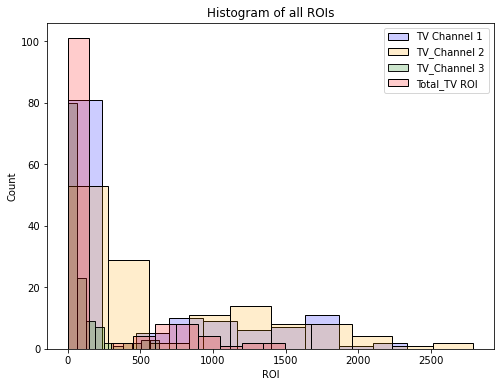

In [187]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a histogram of all ROIs with custom bins and colors
plt.figure(figsize=(8, 6))
sns.histplot(data=sales_tv_spent, x='TV_Channel_1_ROI', bins=10, color='blue', alpha=0.2, label='TV Channel 1')
sns.histplot(data=sales_tv_spent, x='TV_Channel_2_ROI', bins=10, color='orange', alpha=0.2, label='TV_Channel 2')
sns.histplot(data=sales_tv_spent, x='TV_Channel_3_ROI', bins=10, color='green', alpha=0.2, label='TV_Channel 3')
sns.histplot(data=sales_tv_spent, x='TV_ROI', bins=10, color='red', alpha=0.2, label='Total_TV ROI', multiple='stack')

plt.xlabel('ROI')
plt.ylabel('Count')
plt.title('Histogram of all ROIs')
plt.legend()
plt.show()




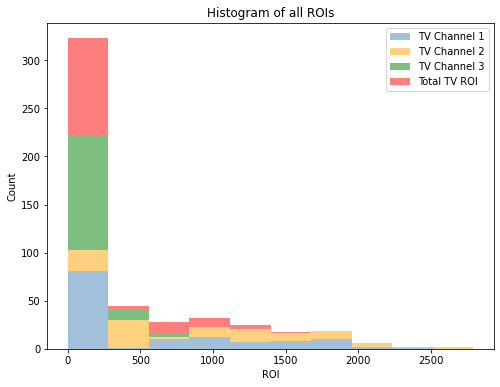

In [131]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a histogram of all ROIs with custom bins and colors
plt.figure(figsize=(8, 6))
plt.hist([sales_tv_spent['TV_Channel_1_ROI'], sales_tv_spent['TV Channel_2_ROI'], sales_tv_spent['TV_Channel_3_ROI'], sales_tv_spent['TV_ROI']],
         bins=10, color=['steelblue', 'orange', 'green', 'red'], alpha=0.5, label=['TV Channel 1', 'TV Channel 2', 'TV Channel 3', 'Total TV ROI'], stacked=True)

plt.xlabel('ROI')
plt.ylabel('Count')
plt.title('Histogram of all ROIs')
plt.legend()
plt.show()




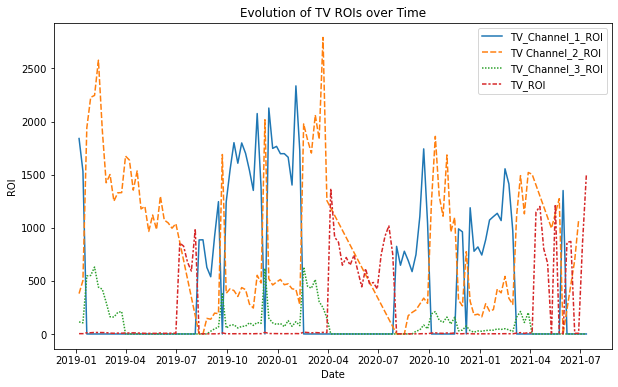

In [133]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a copy of the data and set Date as the index
sales_tv_spent_date = sales_tv_spent.set_index('Date')



# Create a line plot of the ROI metrics over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=sales_tv_spent_date[['TV_Channel_1_ROI', 'TV Channel_2_ROI', 'TV_Channel_3_ROI', 'TV_ROI']])
plt.xlabel('Date')
plt.ylabel('ROI')
plt.title('Evolution of TV ROIs over Time')
plt.show()


In [189]:
print(sales_tv_spent.head())

        Date        Value  tv_channel_1  tv_channel_2  tv_channel_3  \
0 2019-01-07  2333.774722           605           125     37.381706   
1 2019-01-14  2140.697120           508           167     34.766218   
2 2019-01-21  2485.883420             0           166     46.756001   
3 2019-01-28  2777.820794             0           191     47.218405   
4 2019-02-04  2875.494071             0           158     44.303406   

   TV_Channel_1_ROI  TV_Channel_2_ROI  TV_Channel_3_ROI     TV_ROI  
0       1839.936627        380.152196        113.685900   3.041218  
1       1532.158209        503.681931        104.856980   3.016059  
2          0.000000       1939.577006        546.306414  11.684199  
3          0.000000       2227.215701        550.605094  11.660815  
4          0.000000       2245.775648        629.718424  14.213770  


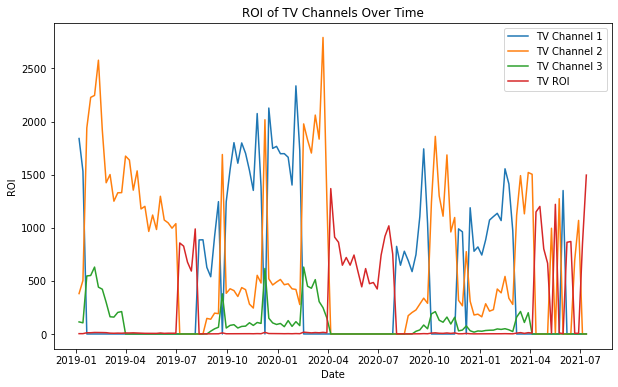

In [215]:
import matplotlib.pyplot as plt

# Extract the required columns
date = sales_tv_spent['Date']
tv1_roi = sales_tv_spent['TV_Channel_1_ROI']
tv2_roi = sales_tv_spent['TV_Channel_2_ROI']
tv3_roi = sales_tv_spent['TV_Channel_3_ROI']
tv_roi = sales_tv_spent['TV_ROI']

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('ROI of TV Channels Over Time')
ax.set_xlabel('Date')
ax.set_ylabel('ROI')

# Plot the lines
ax.plot(date, tv1_roi, label='TV Channel 1')
ax.plot(date, tv2_roi, label='TV Channel 2')
ax.plot(date, tv3_roi, label='TV Channel 3')
ax.plot(date, tv_roi, label='TV ROI')

# Add a legend
ax.legend()

# Display the plot
plt.show()


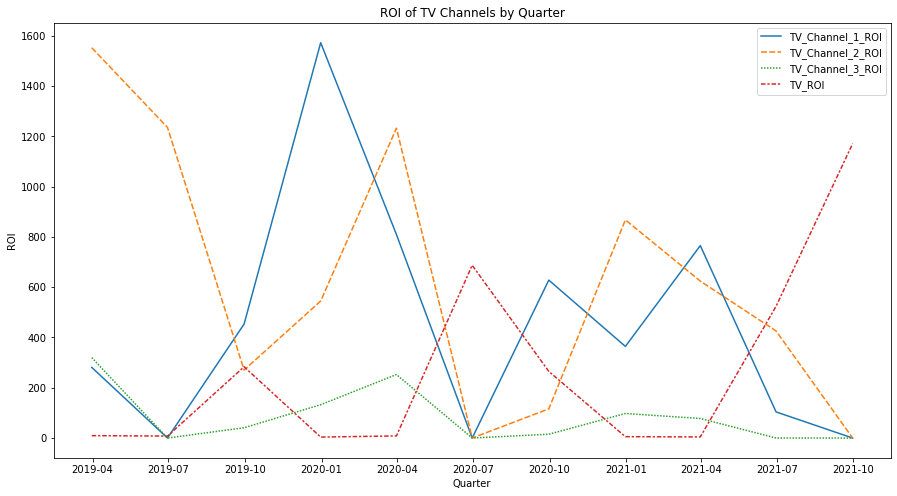

In [230]:
# Resample the data by quarter
#sales_tv_spent.set_index('Date', inplace=True)
df_quarter = sales_tv_spent.resample('Q').mean()

plt.figure(figsize=(15,8))
# Plot the lines for the quarterly resampled dataset
sns.lineplot(data=df_quarter[['TV_Channel_1_ROI', 'TV_Channel_2_ROI', 'TV_Channel_3_ROI', 'TV_ROI']])
plt.xlabel('Quarter')
plt.ylabel('ROI')
plt.title('ROI of TV Channels by Quarter')

# Display the plot
plt.show()




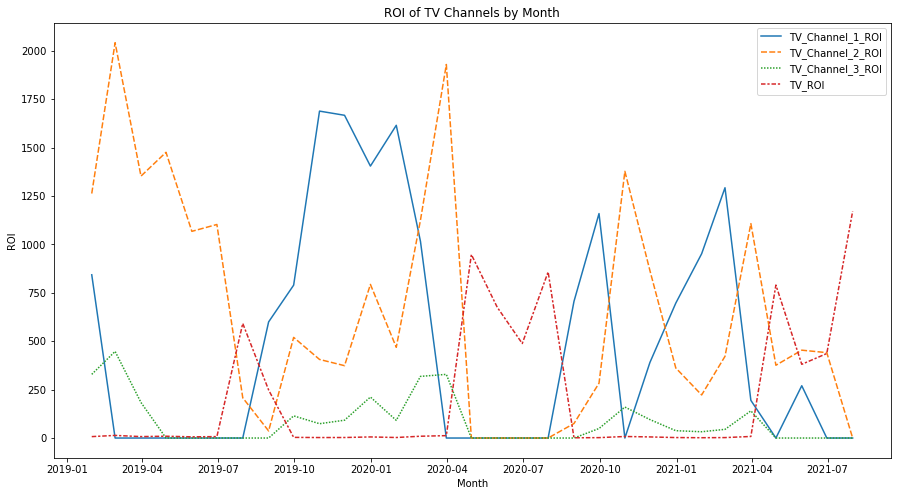

In [235]:
# Resample the data by quarter
#sales_tv_spent.set_index('Date', inplace=True)
df_month = sales_tv_spent.resample('M').mean()

plt.figure(figsize=(15,8))
# Plot the lines for the quarterly resampled dataset
sns.lineplot(data=df_month[['TV_Channel_1_ROI', 'TV_Channel_2_ROI', 'TV_Channel_3_ROI', 'TV_ROI']])
plt.xlabel('Month')
plt.ylabel('ROI')
plt.title('ROI of TV Channels by Month')

# Display the plot
plt.show()

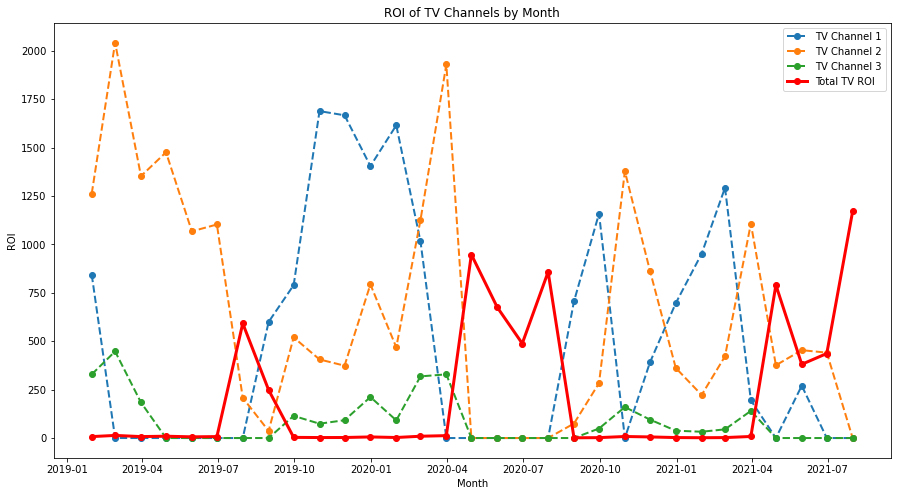

In [242]:


# Set up the plot
fig, ax = plt.subplots(figsize=(15, 8))

# Plot the lines
ax.plot(df_month.index, df_month['TV_Channel_1_ROI'], label='TV Channel 1', linewidth=2, marker='o', linestyle='dashed' )
ax.plot(df_month.index, df_month['TV_Channel_2_ROI'], label='TV Channel 2', linewidth=2, marker='o', linestyle='dashed' )
ax.plot(df_month.index, df_month['TV_Channel_3_ROI'], label='TV Channel 3', linewidth=2, marker='o', linestyle='dashed' )
ax.plot(df_month.index, df_month['TV_ROI'], label='Total TV ROI', linewidth=3, color='red', marker='o' )

# Add legend and labels
ax.legend()
ax.set_xlabel('Month')
ax.set_ylabel('ROI')
ax.set_title('ROI of TV Channels by Month')


# Display the plot
plt.show()


In [245]:
sales_tv_spent = sales_tv_spent.reset_index()
sales_tv_spent

,Date,Value,tv_channel_1,tv_channel_2,tv_channel_3,TV_Channel_1_ROI,TV_Channel_2_ROI,TV_Channel_3_ROI,TV_ROI
0,2019-01-07,2333.774722,605,125,37.381706,1839.936627,380.152196,113.685900,3.041218
1,2019-01-14,2140.697120,508,167,34.766218,1532.158209,503.681931,104.856980,3.016059
2,2019-01-21,2485.883420,0,166,46.756001,0.000000,1939.577006,546.306414,11.684199
3,2019-01-28,2777.820794,0,191,47.218405,0.000000,2227.215701,550.605094,11.660815
4,2019-02-04,2875.494071,0,158,44.303406,0.000000,2245.775648,629.718424,14.213770
...,...,...,...,...,...,...,...,...,...
127,2021-06-14,870.464955,0,0,0.000000,0.000000,0.000000,0.000000,870.464955
128,2021-06-21,694.992249,0,111,0.000000,0.000000,694.992249,0.000000,6.261191
129,2021-06-28,1069.005723,0,174,0.000000,0.000000,1069.005723,0.000000,6.143711
130,2021-07-05,846.533905,0,0,0.000000,0.000000,0.000000,0.000000,846.533905


In [255]:
sales_promo_events.sort_values(by ='Cost')

,Date,Value,Topic,Region,Target,Cost,Participants
49,2018-09-01,52670.045106,COUGH,TOULOUSE,PHYSICIANS,10.475,31
59,2018-12-01,82616.154802,SOAR THROAT,PARIS,PHYSICIANS,10.996,99
3,2017-05-01,32764.042520,C&C,PARIS,PHYSICIANS,11.039,298
12,2018-01-01,84592.519326,COUGH,MARSEILLE,GENERAL,11.493,80
14,2018-01-01,84592.519326,COUGH,MARSEILLE,PHYSICIANS,11.842,71
...,...,...,...,...,...,...,...
11,2017-09-01,55884.359040,PULMONAR,OTHER,PHARMACIES,29.485,59
40,2018-06-01,26147.977383,C&C,PARIS,PHARMACIES,29.592,266
26,2018-02-01,77662.014620,C&C,MARSEILLE,PHARMACIES,29.827,89
65,2019-07-01,1038.626315,COUGH,OTHER,PHARMACIES,29.843,239


In [276]:
# Group the data by Topic and calculate the total sales and total promotional expenses
grouped = sales_promo_events.groupby('Topic').agg({
    'Value': 'sum',
    'Cost': 'sum'
})

In [277]:
grouped['ROI'] = (grouped['Value'] - grouped['Cost']) / grouped['Cost']

In [275]:
sales_promo_events.columns

Index(['Date', 'Value', 'Topic', 'Region', 'Target', 'Cost', 'Participants'], dtype='object')

In [278]:
sales_promo_events = sales_promo_events.merge(grouped['ROI'], on='Topic')

In [279]:
sales_promo_events

,Date,Value,Topic,Region,Target,Cost,Participants,ROI
0,2017-02-01,56386.698300,C&C,PARIS,GENERAL,24.881,523,2007.916008
1,2017-02-01,56386.698300,C&C,PARIS,PHYSICIANS,15.634,375,2007.916008
2,2017-05-01,32764.042520,C&C,PARIS,PHYSICIANS,11.039,298,2007.916008
3,2017-09-01,55884.359040,C&C,TOULOUSE,GENERAL,17.376,70,2007.916008
4,2017-09-01,55884.359040,C&C,TOULOUSE,PHYSICIANS,18.984,95,2007.916008
...,...,...,...,...,...,...,...,...
70,2018-04-01,30718.078461,FLU,OTHER,PHARMACIES,12.357,49,3032.984611
71,2018-04-01,30718.078461,FLU,OTHER,GENERAL,14.466,72,3032.984611
72,2018-04-01,30718.078461,FLU,OTHER,PHARMACIES,25.215,202,3032.984611
73,2018-09-01,52670.045106,FLU,TOULOUSE,PHYSICIANS,14.175,128,3032.984611


In [212]:
import pandas as pd
import matplotlib.pyplot as plt

import pandas as pd
import matplotlib.pyplot as plt

def plot_roi_by_date(data, date_dimension):
    # Group by the desired date dimension and sum the values
    if date_dimension == 'week':
        data_grouped = data.groupby(pd.Grouper(key='Date', freq='W-MON')).sum()
        x_label = 'Week'
        x_tick_format = '%b %d'  # example: Jan 01
    elif date_dimension == 'month':
        data_grouped = data.groupby(pd.Grouper(key='Date', freq='M')).sum()
        x_label = 'Month'
        x_tick_format = '%b %Y'  # example: Jan 2023
    elif date_dimension == 'day':
        data_grouped = data.groupby('Date').sum()
        x_label = 'Day'
        x_tick_format = '%b %d, %Y'  # example: Jan 01, 2023
    elif date_dimension == 'quarter':
        data_grouped = data.groupby(pd.Grouper(key='Date', freq='Q')).sum()
        x_label = 'Quarter'
        x_tick_format = '%b %Y'  # example: Jan 2023
    else:
        raise ValueError('Invalid date dimension')

    # Select the columns with ROI variables and create the stacked bar plot
    roi_cols = [col for col in data.columns if 'ROI' in col]
    ax = data_grouped[roi_cols].plot(kind='bar', stacked=True, figsize=(10, 6))

    # Set the labels and titles
    ax.set_xlabel(x_label)
    ax.set_ylabel('ROI')
    ax.set_title('ROI by {}'.format(x_label))
    ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

    # Set the x-axis tick format
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: pd.to_datetime(x).strftime(x_tick_format)))
    
    plt.show()



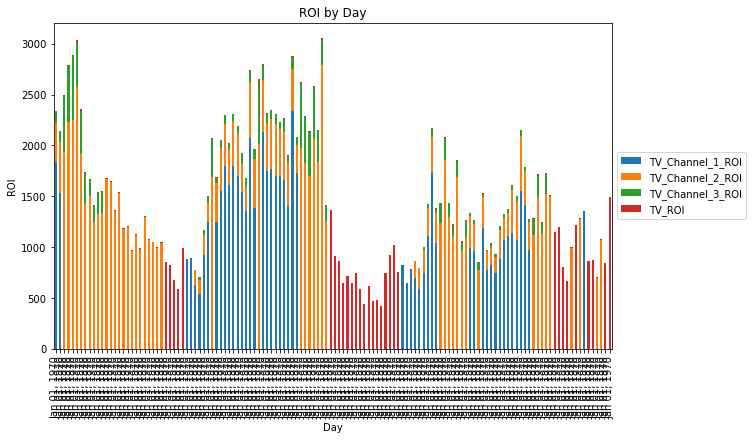

In [214]:
plot_roi_by_date(sales_tv_spent, 'day')


In [165]:
def plot_roi_by_date(df, date_col, time_period):
    # Define dictionary of time periods and corresponding resampling frequencies
    time_period_map = {
        'day': ('D', '%Y-%m-%d'),
        'week': ('W-MON', '%Y-%m-%d'),
        'month': ('M', '%Y-%m'),
        'quarter': ('Q', '%Y-Q%q')
    }
    
    # Resample the data by the specified time period
    freq, date_fmt = time_period_map.get(time_period, ('D', '%Y-%m-%d'))
    df = df.set_index(date_col).resample(freq).sum().reset_index()
    
    # Format the x-axis labels
    df[date_col] = df[date_col].dt.strftime(date_fmt)

    # Create a bar plot of the ROIs by TV channel and total ROI
    plt.figure(figsize=(10, 6))
    sns.barplot(x=date_col, y='TV_Channel_1_ROI', data=df, color='blue', alpha=0.2, label='TV Channel 1')
    sns.barplot(x=date_col, y='TV_Channel_2_ROI', data=df, color='yellow', alpha=0.2, label='TV Channel 2')
    sns.barplot(x=date_col, y='TV_Channel_3_ROI', data=df, color='green', alpha=0.2, label='TV Channel 3')
    sns.barplot(x=date_col, y='TV_ROI', data=df, color='red', alpha=0.2, label='Total TV ROI')
    
    plt.xlabel(date_col.capitalize())
    plt.ylabel('ROI')
    plt.title(f'ROI by TV Channel and Total ROI ({time_period.capitalize()}ly)')
    plt.legend()
    plt.xticks(rotation=45) 
    plt.show()




In [167]:
def plot_roi_by_date(df, date_col, time_period):
    # Define dictionary of time periods and corresponding resampling frequencies
    time_period_map = {
        'day': ('D', '%Y-%m-%d'),
        'week': ('W-MON', '%Y-%m-%d'),
        'month': ('M', '%Y-%m'),
        'quarter': ('Q', '%Y-Q%q')
    }
    
    # Resample the data by the specified time period
    freq, date_fmt = time_period_map.get(time_period, ('D', '%Y-%m-%d'))
    df = df.set_index(date_col).resample(freq).sum().reset_index()
    
    # Format the x-axis labels
    df[date_col] = df[date_col].dt.strftime(date_fmt)

    # Create a line plot of the ROIs by TV channel and total ROI
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=date_col, y='TV_Channel_1_ROI', data=df, color='blue', alpha=0.8, label='TV Channel 1')
    sns.lineplot(x=date_col, y='TV_Channel_2_ROI', data=df, color='yellow', alpha=0.8, label='TV Channel 2')
    sns.lineplot(x=date_col, y='TV_Channel_3_ROI', data=df, color='green', alpha=0.8, label='TV Channel 3')
    sns.lineplot(x=date_col, y='TV_ROI', data=df, color='red', alpha=0.8, label='Total TV ROI')
    
    plt.xlabel(date_col.capitalize())
    plt.ylabel('ROI')
    plt.title(f'ROI by TV Channel and Total ROI ({time_period.capitalize()}ly)')
    plt.legend()
    plt.xticks(rotation=45) 
    plt.show()


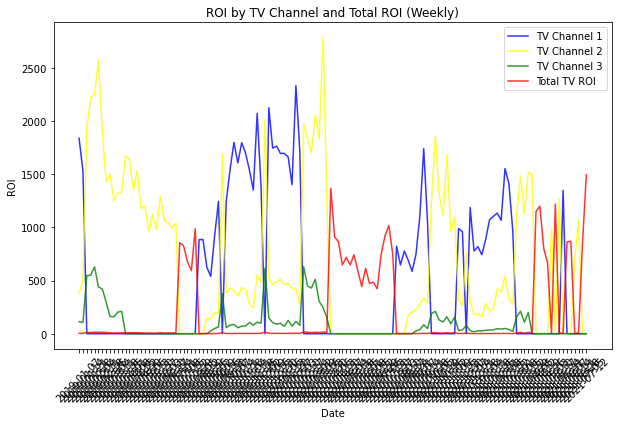

In [188]:
plot_roi_by_date(sales_tv_spent, 'Date', 'week')

In [153]:
sales_tv_spent.head()

,Date,Value,tv_channel_1,tv_channel_2,tv_channel_3,TV_Channel_1_ROI,TV_Channel_2_ROI,TV_Channel_3_ROI,TV_ROI
0,2019-01-07,2333.774722,605,125,37.381706,1839.936627,380.152196,113.685900,3.041218
1,2019-01-14,2140.697120,508,167,34.766218,1532.158209,503.681931,104.856980,3.016059
2,2019-01-21,2485.883420,0,166,46.756001,0.000000,1939.577006,546.306414,11.684199
3,2019-01-28,2777.820794,0,191,47.218405,0.000000,2227.215701,550.605094,11.660815
4,2019-02-04,2875.494071,0,158,44.303406,0.000000,2245.775648,629.718424,14.213770


In [60]:
# Calculate the correlations between the variables and sales
corr_tv_spent = sales_tv_spent.corr()['Value'].loc['tv_channel_1':'tv_channel_3']
corr_promo_events = sales_promo_events.corr()['Value'].loc['Cost':'Participants']
corr_onsite_trade = sales_onsite_trade.corr()['Value_x'].loc['Value_y']

# Print the results
print('Correlations with Sales')
print('TV Spending:')
print(corr_tv_spent)
print('Promotional Events:')
print(corr_promo_events)
print('Trade Marketing:')
print(corr_onsite_trade)


Correlations with Sales
TV Spending:
tv_channel_1    0.225166
tv_channel_2    0.553599
tv_channel_3    0.805690
Name: Value, dtype: float64
Promotional Events:
Cost           -0.020202
Participants    0.030821
Name: Value, dtype: float64
Trade Marketing:
0.6382765183266325


In [22]:
from src.data.eda import Eda

In [23]:
eda = Eda()

In [24]:
var = [sales_tv_spent]

eda.plot_distribution_comp(sales_tv_spent)

TypeError: plot_distribution_comp() missing 2 required positional arguments: 'target' and 'var'

In [52]:
merged_df.head()

,Date,Value_x,tv_channel_1,tv_channel_2,tv_channel_3,Topic,Region_x,Target,Cost,Participants,Region_y,Value_y,Total Sales
0,2017-01-01,83256.294414,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PARIS,1508.00,3.460785e+07
1,2017-01-01,83256.294414,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ATLANTIQUE,1055.60,3.460785e+07
2,2017-01-01,83256.294414,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ATLANTIQUE,527.80,3.460785e+07
3,2017-01-01,83256.294414,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NORDEST,603.20,3.460785e+07
4,2017-01-01,83256.294414,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NORDEST,633.36,3.460785e+07


In [53]:
# Calculate the weekly ROI for each investment channel
merged_df['TV ROI'] = merged_df['Total Sales'] / merged_df[tv_spent_df.columns[1:]].sum(axis=1)
merged_df['Promo Events ROI'] = merged_df['Total Sales'] / merged_df['Cost']
merged_df['Onsite Trade ROI'] = merged_df['Total Sales'] / merged_df['Value_y']


In [54]:
merged_df

,Date,Value_x,tv_channel_1,tv_channel_2,tv_channel_3,Topic,Region_x,Target,Cost,Participants,Region_y,Value_y,Total Sales,TV ROI,Promo Events ROI,Onsite Trade ROI
0,2017-01-01,83256.294414,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PARIS,1508.00,3.460785e+07,inf,NaN,22949.501234
1,2017-01-01,83256.294414,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ATLANTIQUE,1055.60,3.460785e+07,inf,NaN,32785.001762
2,2017-01-01,83256.294414,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ATLANTIQUE,527.80,3.460785e+07,inf,NaN,65570.003525
3,2017-01-01,83256.294414,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NORDEST,603.20,3.460785e+07,inf,NaN,57373.753084
4,2017-01-01,83256.294414,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NORDEST,633.36,3.460785e+07,inf,NaN,54641.669604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
848,2021-06-14,870.464955,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.460785e+07,inf,NaN,NaN
849,2021-06-21,694.992249,0.0,111.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.460785e+07,3.117824e+05,NaN,NaN
850,2021-06-28,1069.005723,0.0,174.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.460785e+07,1.988957e+05,NaN,NaN
851,2021-07-05,846.533905,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.460785e+07,inf,NaN,NaN


In [49]:
merged_df['Value_x'].sum()

34607847.86030534

              Total Sales
Value_x               NaN
tv_channel_1          NaN
tv_channel_2          NaN
tv_channel_3          NaN
Cost                  NaN


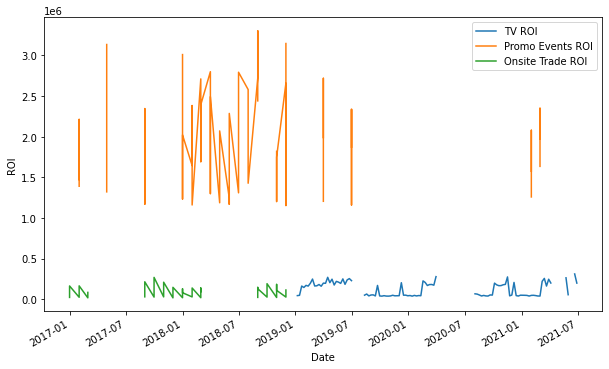

In [55]:
import matplotlib.pyplot as plt
# Calculate the correlation between the investment channels and the total sales
corr_df = merged_df.corr()[['Total Sales']]
corr_df = corr_df.drop(['Total Sales'])

# Print the top correlated investment channels
print(corr_df.abs().sort_values(by='Total Sales', ascending=False).head())

# Plot the weekly ROI for each investment channel
fig, ax = plt.subplots(figsize=(10, 6))
merged_df.plot(x='Date', y=['TV ROI', 'Promo Events ROI', 'Onsite Trade ROI'], ax=ax)
plt.ylabel('ROI')
plt.show()